In [1]:
cd C:\Users\Kaushik\AppData\Local\Packages\CanonicalGroupLimited.UbuntuonWindows_79rhkp1fndgsc\LocalState\rootfs\home\kamanch2

C:\Users\Kaushik\AppData\Local\Packages\CanonicalGroupLimited.UbuntuonWindows_79rhkp1fndgsc\LocalState\rootfs\home\kamanch2


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scrublet as scr
import matplotlib.pyplot as plt
import scanpy as sc
import scipy.io
import os

In [3]:
adata = sc.read_10x_mtx('ctrl_3.output', cache=False)
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 6828 × 24396
    var: 'gene_ids'

In [4]:
scrub = scr.Scrublet(adata.X, expected_doublet_rate = 0.076)

In [5]:
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets(min_counts=2, min_cells=3, 
                                                          min_gene_variability_pctl=85, n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.20
Detected doublet rate = 9.0%
Estimated detectable doublet fraction = 36.2%
Overall doublet rate:
	Expected   = 7.6%
	Estimated  = 24.8%
Elapsed time: 7.6 seconds


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

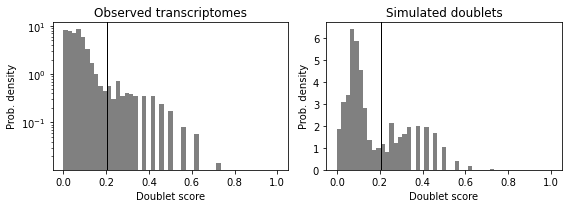

In [6]:
scrub.plot_histogram()

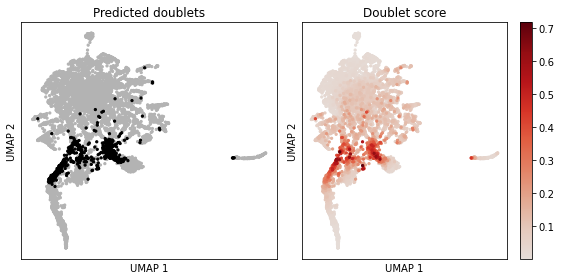

In [7]:
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
scrub.plot_embedding('UMAP', order_points=True);

In [8]:
adata.obs

,doublet_scores,predicted_doublets
AAACCCACAAATTGGA-1,0.092288,False
AAACCCACAATTGCAC-1,0.054583,False
AAACCCACACACCTAA-1,0.080368,False
AAACCCACACCCGTAG-1,0.018986,False
AAACCCAGTAATACCC-1,0.068131,False
...,...,...
TTTGTTGCACGTCATA-1,0.017646,False
TTTGTTGCAGCGATTT-1,0.375570,True
TTTGTTGGTCCTGTTC-1,0.068131,False
TTTGTTGGTGACCTGC-1,0.051299,False


In [9]:
adata.obs['predicted_doublets'].value_counts()

False    6215
True      613
Name: predicted_doublets, dtype: int64

In [10]:
pd.DataFrame(adata.obs).to_csv("ctrl_3_scrublet_calls.tsv",sep = '\t',header = False)